# 선형회귀

In [2]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )


from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

- 선형회귀

In [4]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)

print(lr.predict([[50]]))       # 50센치 농어데이터에 대한 예측

[1241.83860323]


In [8]:
print("계수 : {}".format(lr.coef_[0]))
print("편향 : {}".format(lr.intercept_))

계수 : 39.0171449636302
편향 : -709.0186449535477


- 15센치부터 50센치까지 농어의 무게를 예측하는 선형 그래프를 그려보자

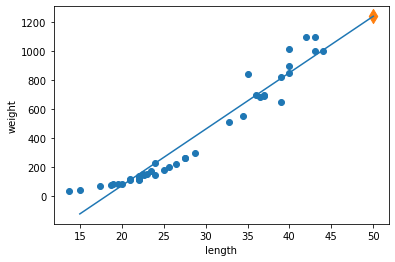

In [26]:
from matplotlib import pyplot as plt

x = np.arange(15,51).reshape(-1,1)
plt.scatter(train_input, train_target)
plt.scatter(50,1241, marker="d", s=100)
plt.plot(x, lr.predict(x))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [28]:
print("model train score : {} ".format(lr.score(train_input, train_target)))
print("model test score : {} ".format(lr.score(test_input,test_target)))

model train score : 0.939846333997604 
model test score : 0.8247503123313558 


## - 다항 회귀
- 계수를 n차항까지 늘리는 것 

In [34]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
poly.fit(train_input)

train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [35]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print("계수 : {}".format(lr.coef_))
print("편향 : {}".format(lr.intercept_))

계수 : [  0.         -21.55792498   1.01433211]
편향 : 116.05021078278725


- 2차항 시각화

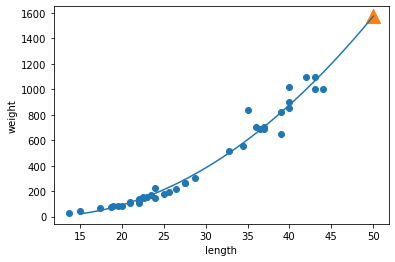

In [43]:
x = np.arange(15,51).reshape(-1,1)
x_poly = poly.transform(x)
plt.scatter(train_input, train_target)
plt.scatter([50], [1574], marker='^', s=200)
plt.plot(x, lr.predict(x_poly))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()